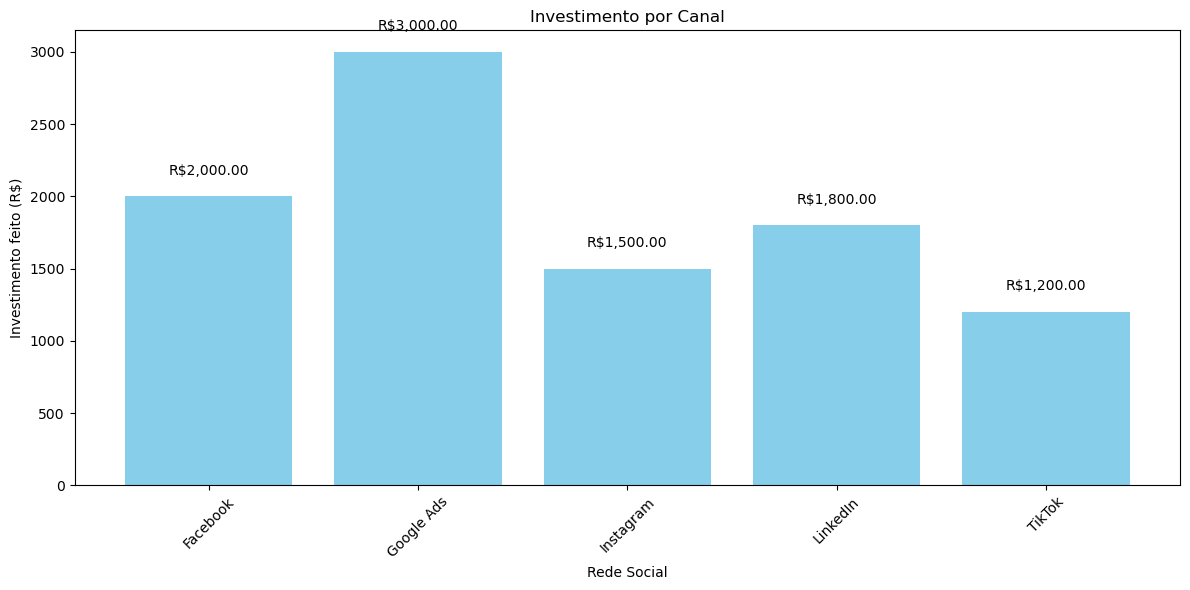

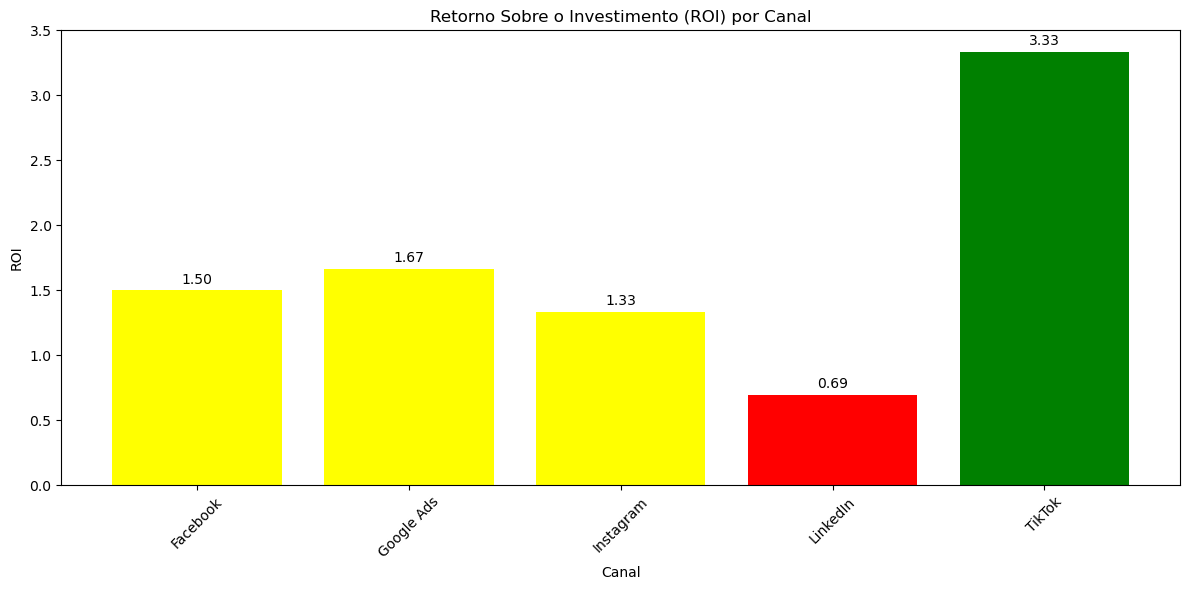

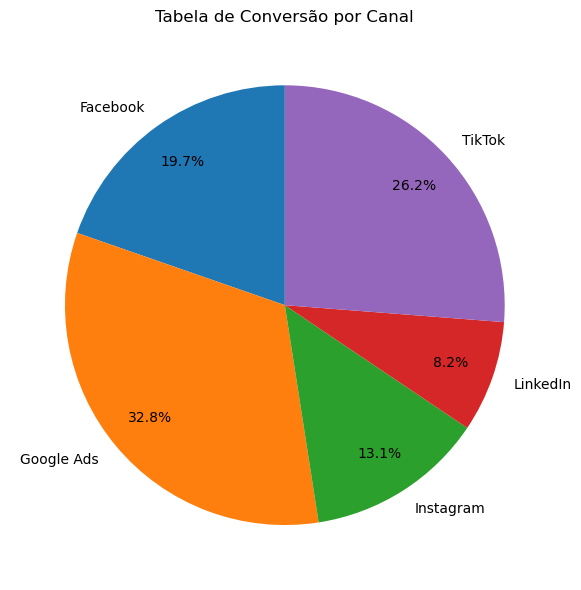

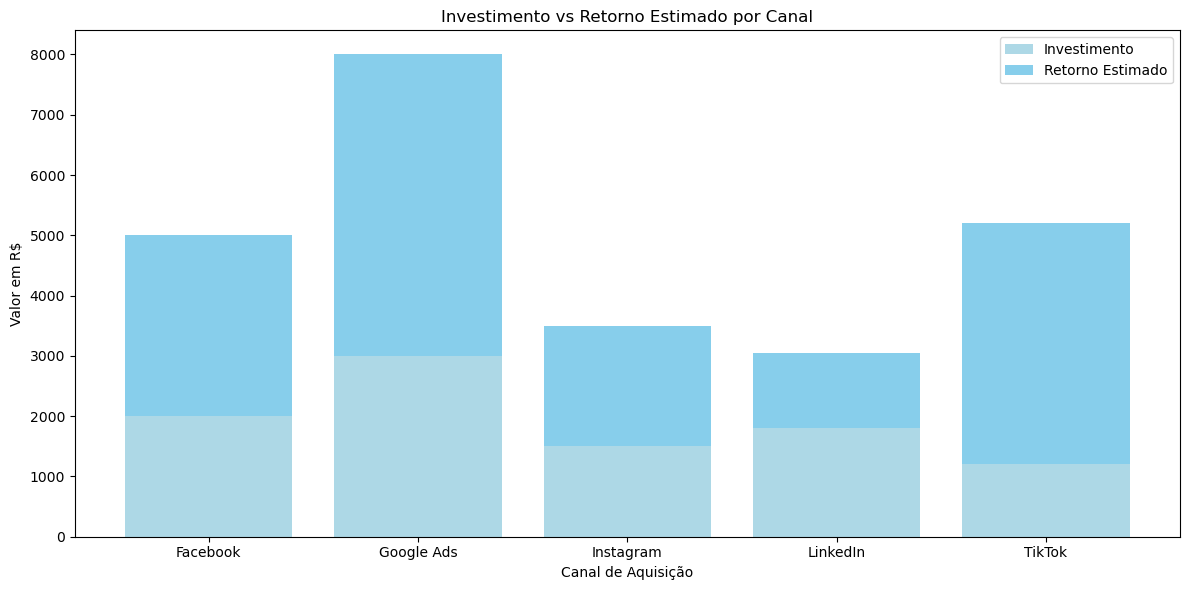

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Carregamento dos dados

# Lê os dados das campanhas e seus resultados a partir de arquivos CSV
campanhas = pd.read_csv('../data/campanhas.csv')
resultados = pd.read_csv('../data/resultados.csv')

# Converte as colunas de datas para o formato datetime
campanhas['Inicio'] = pd.to_datetime(campanhas['Inicio'])
campanhas['Fim'] = pd.to_datetime(campanhas['Fim'])

# Junta os dois DataFrames com base na chave 'Campanha_ID'
df_resultado_campanha = pd.merge(campanhas, resultados, on='Campanha_ID')

# 2. Cálculo de métricas por canal

# Agrupa por canal e soma os valores de orçamento e conversões
df_metricas = df_resultado_campanha.groupby('Canal')[['Orcamento', 'Conversoes']].sum()

# Calcula o valor estimado de venda assumindo que cada conversão vale R$50 (ticket médio)
df_metricas['Valor_Venda'] = df_metricas['Conversoes'] * 50

# Calcula o ROI (Retorno sobre o Investimento)
df_metricas['ROI'] = ((df_metricas['Conversoes'] * 50)/df_metricas['Orcamento'])

# Reinicia o índice para transformar 'Canal' em coluna novamente
df_metricas = df_metricas.reset_index()

# Cria uma tabela dinâmica (pivot table) - opcional se quiser usar depois
pivot = pd.pivot_table(
            df_resultado_campanha,
            values=['Conversoes', 'Orcamento'],
            index=['Canal'], 
            aggfunc='sum')

# 3. Classificação do ROI

# Função que classifica o ROI em três categorias
def classificar(ROI):
    if ROI > 2:
        return 'Excelente'
    
    elif ROI >= 1:
        return 'Bom'
    
    else:
        return 'Ruim'
 
# Aplica a função de classificação ao DataFrame
df_metricas['Classificacao_ROI'] = df_metricas['ROI'].apply(classificar)

# 4. Funções de visualização

# Gráfico de barras: mostra o investimento feito por canal
def grafico_investimento_por_canal(df):
    plt.figure(figsize=(12,6))
    plt.bar(df['Canal'], df['Orcamento'], color='skyblue')
    plt.xlabel('Rede Social')
    plt.ylabel('Investimento feito (R$)')
    plt.title('Investimento por Canal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Adiciona os valores nos topos das barras
    for i, valor in enumerate(df['Orcamento']):
        plt.text(i, valor + 0.05 * max(df['Orcamento']), f'R${valor:,.2f}', ha='center')
    
    # Salva o gráfico em arquivo
    plt.savefig('../images/investimento_por_canal.png', dpi=300, bbox_inches='tight')    
    plt.show()

# Gráfico de barras colorido: mostra o ROI com base na classificação
def grafico_roi_por_canal(df):
    # Define as cores com base na classificação do ROI
    cores = df['Classificacao_ROI'].map({
        'Excelente': 'green',
        'Bom': 'yellow',
        'Ruim': 'red'
    })
    
    plt.figure(figsize=(12,6))
    plt.bar(df['Canal'], df['ROI'], color= cores)
    plt.xlabel('Canal')
    plt.ylabel('ROI')
    plt.title('Retorno Sobre o Investimento (ROI) por Canal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Adiciona os valores nos topos das barras
    for i, valor in enumerate(df['ROI']):
        plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center')
    
    # Salva o gráfico em arquivo
    plt.savefig('../images/roi_por_canal.png', dpi=300, bbox_inches='tight')    
    plt.show()

# Gráfico de pizza: mostra a distribuição percentual das conversões por canal
def grafico_pizza_conversao_por_canal(df):
    plt.figure(figsize=(12,6))
    plt.pie(df['Conversoes'], 
            labels=df['Canal'],
            autopct='%1.1f%%',
            pctdistance=0.8,
            startangle=90)
    plt.title('Tabela de Conversão por Canal')
    plt.tight_layout()
    
    # Salva o gráfico em arquivo
    plt.savefig('../images/pizza_conversao_por_canal.png', dpi=300, bbox_inches='tight')    
    plt.show()

# Gráfico de barras empilhadas: compara o investimento com o retorno estimado
def grafico_empilhado_investimento_retorno(df):
    plt.figure(figsize=(12,6))
    plt.bar(df['Canal'], df['Orcamento'], label='Investimento', color='lightblue')
    plt.bar(df['Canal'], df['Valor_Venda'], bottom=df['Orcamento'], label='Retorno Estimado', color='skyblue')
    
    plt.ylabel('Valor em R$')
    plt.xlabel('Canal de Aquisição')
    plt.title('Investimento vs Retorno Estimado por Canal')
    plt.legend()
    plt.tight_layout()
    
    # Salva o gráfico em arquivo
    plt.savefig('../images/empilhado_investimento_retorno.png', dpi=300, bbox_inches='tight')    
    plt.show()

# 5. Exportação de resultados

# Salva a tabela final com as métricas e classificações em um arquivo CSV
df_metricas.to_csv('../data/metricas_marketing.csv', index=False)

grafico_investimento_por_canal(df_metricas)
grafico_roi_por_canal(df_metricas)
grafico_pizza_conversao_por_canal(df_metricas)
grafico_empilhado_investimento_retorno(df_metricas)